(241380, 11)
(122338, 13) (122338, 13)


/usr/lib64/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


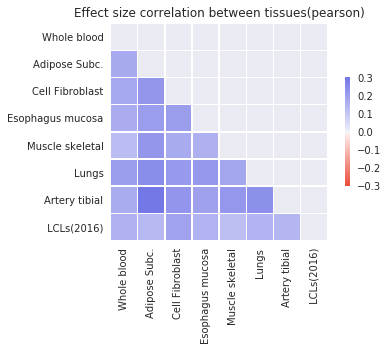

In [1]:
#QQplot for all tissues
#Run the following command from anywhere to obtain the figure
#projects/GTEX_eSTRs/gtex-estrs/Scripts/PostRegressionFixes/Mult_tissue_qqplot.r path-to-wholeblood-regression-file
# 
#
#Workflow / pipeline figure
#In Slides
#
#
##Comparison of eSTR effect sizes as Pearson correlation between tissues and LCLs
#
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

Tissues = ['WholeBlood','Cells-Transformedfibroblasts','Muscle-Skeletal','Lung','Adipose-Subcutaneous','Artery-Tibial','Esophagus-Mucosa']
LinReg = pd.read_csv('/storage/szfeupe/Runs/GTEx_estr/Analysis_by_Tissue/SUMMARY/LR_SummaryTest_Table.tsv', sep='\t')
OldTable = pd.read_csv('/storage/szfeupe/Runs/GTEx_estr/2016_estrs_table.csv',sep=',') #Nature paper


#Removing gene versions
G2 = [x.split('.')[0] for x in list(LinReg['gene'])]           
LinReg['gene']=G2
#Select columns of interest
Columns=['gene','chrom', 'str.start', 'beta_blood', 'beta_AdipSub','beta_Fibroblast', 'beta_Esophag', 'beta_MuscleS', 'beta_Lung', 'beta_ArteryT','eSTR_In_tissues']
LinReg = LinReg[Columns]
LinReg['str.start'] = LinReg['str.start'].astype(int)
print(LinReg.shape)

#Nature paper study
OldTable['str.start'] = OldTable['str.start']-1       #Adjust start point
OldTable = OldTable[['gene','chrom','str.start','beta','signif.estr']]
#--
MainTable= LinReg.merge(OldTable, on=['gene','chrom','str.start'])
MainTable1 = OldTable.merge(LinReg,on=['gene','chrom','str.start'])
print(MainTable.shape, MainTable1.shape)

data=MainTable[['beta_blood', 'beta_AdipSub','beta_Fibroblast', 'beta_Esophag', 'beta_MuscleS', 'beta_Lung',
'beta_ArteryT', 'beta']]
corrM = data.corr(method='pearson')    
corrM.shape

corrM.columns=['Whole blood', 'Adipose Subc.', 'Cell Fibroblast', 'Esophagus mucosa','Muscle skeletal', 'Lungs', 'Artery tibial', ' LCLs(2016)']  
corrM.index=['Whole blood', 'Adipose Subc.', 'Cell Fibroblast', 'Esophagus mucosa','Muscle skeletal', 'Lungs', 'Artery tibial', ' LCLs(2016)']

# Generate a mask for the upper triangle
mask = np.zeros_like(corrM, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(6, 4))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(15, 265,s=80, l=55, n=9, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrM, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Effect size correlation between tissues(pearson)')
plt.show()

/usr/lib/python3.4/site-packages/ipykernel/__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


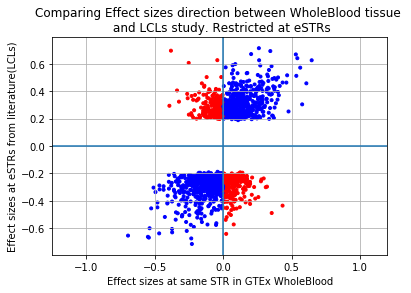

1033 ===== 1442 +++ 1442



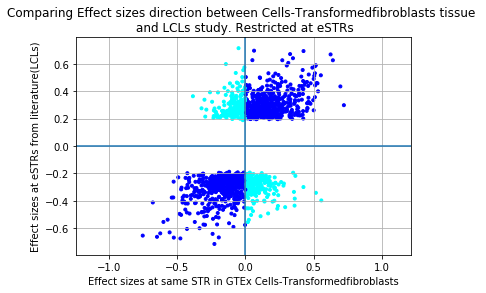

1044 ===== 1454 +++ 1454



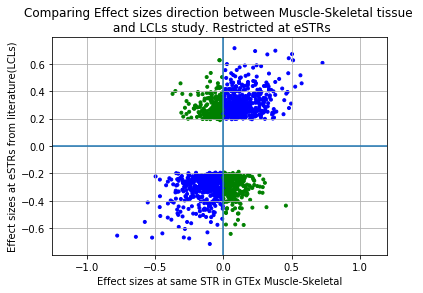

975 ===== 1454 +++ 1454



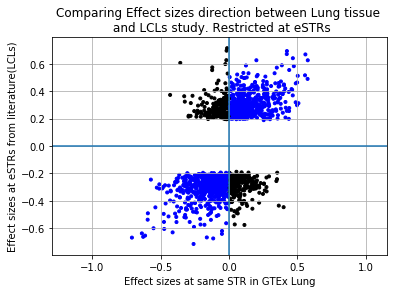

1041 ===== 1493 +++ 1493



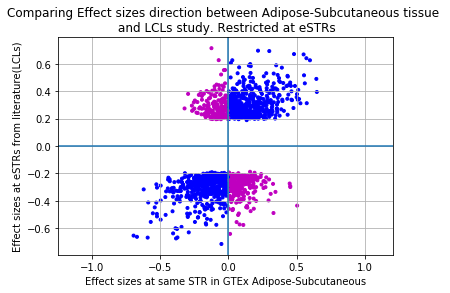

1029 ===== 1477 +++ 1477



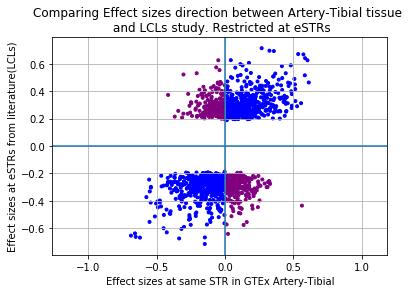

1025 ===== 1471 +++ 1471



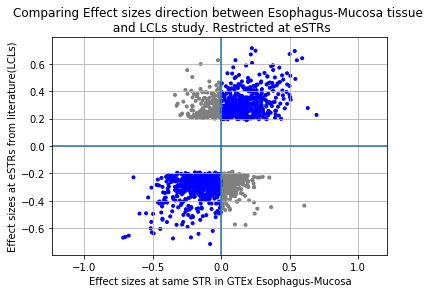

1050 ===== 1489 +++ 1489



In [6]:
#Comparing Intercepts with previous study (LCLs) ---- Reproducibility
#
tissu = ['WholeBlood','Cells-Transformedfibroblasts','Muscle-Skeletal','Lung','Adipose-Subcutaneous','Artery-Tibial','Esophagus-Mucosa']
oldestr = pd.read_csv('/storage/szfeupe/Runs/GTEx_estr/2016_estrs_table.csv',sep=',') ##Nature study
PATHs = '/storage/szfeupe/Runs/GTEx_estr/Analysis_by_Tissue/'

import matplotlib.pyplot as plt
import pandas as pd


c=['','r','cyan','g','black','y','purple','grey' ]; i=0

for Tissue in tissu:
    i=i+1
    ##Get current study
    newestr = pd.read_csv(PATHs+Tissue+'/Lin_Reg_OutFin.txt',sep='\t')
        ##Reformat gene name without version to match old
    G2 = [x.split('.')[0] for x in list(newestr['gene'])]           
    newestr['gene']=G2

    ##only select gene present in both dataset
    NEW = newestr.loc[newestr['gene'].isin(oldestr['gene'])]     #New data in old
    OLD = oldestr.loc[oldestr['gene'].isin(NEW['gene'])]         #Old data in new

    ##adjusting tart position in old data
    OLD['str.start'] = OLD['str.start']-1  #Adjusting hipstr n lobstr POS
    #OLD['str.start'] = list(OLD['start'])
    
    #Select 3 col of interest 
    Int=['gene', 'str.start', 'beta','p.wald','signif.estr']
    G0= OLD.loc[:,Int]      #X_o.loc[:,Int]
    GN= NEW.loc[:,Int]      #X_n.loc[:,Int]

    G0=  G0[G0['signif.estr']==True]
    newrows={x['gene']+'-'+str(int(x['str.start'])) : x['beta'] for y,x in GN.iterrows()}
    oldrows={x['gene']+'-'+str(int(x['str.start'])): x['beta'] for y,x in G0.iterrows()}
    #print(len(newrows.keys()), '\t',len(oldrows.keys()))
    Key = [x for x in newrows.keys() if x in oldrows.keys()]
    #print (len(Key))
    Xn = [newrows[x] for x in Key]
    Yo = [oldrows[x] for x in Key]

    #Tissue vs nature paper 
    CCol = ['b' if Xn[j]*Yo[j]>0 else c[i] for j in range(len(Xn))]
    plt.scatter(Xn,Yo,color=CCol,marker='.')#,edgecolors='b')
    #plt.xlim(-1, 1)
    #plt.ylim(-1, 1)
    plt.ylabel('Effect sizes at eSTRs from literature(LCLs)')
    plt.xlabel('Effect sizes at same STR in GTEx '+Tissue)
    plt.title('Comparing Effect sizes direction between '+Tissue+' tissue \n and LCLs study. Restricted at eSTRs')
    plt.axis('equal')
    plt.axhline(y=0)
    plt.axvline(x=0)
    plt.grid()
    plt.show()
    CC=[Xn[i]*Yo[i] for i in range(len(Xn))]
    print(len([x for x in CC if x>0]),"=====",len(Xn), '+++', len(Yo))
    print()
#
#